# Exploratory Data Analysis

Let's get a feel for our data. For now, let's only look at the electricity consumption data from 2016.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
plt.rcParams['figure.figsize'] = [18,10]

## EDA: 2016 Electricity Consumption

In [2]:
cons_2016 = pd.read_csv('./Data/formatted/cons_2016.csv')
cons_2016 = cons_2016.drop('Unnamed: 0',axis = 1) #getting rid of unnecessary columns
cons_2016 = cons_2016.drop('Hour_End',axis = 1)

In [3]:
#Converting the time column to datetimes:
cons_2016['Time'] = cons_2016['Time'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [4]:
#Setting the datetime column as the index of the df:
cons_2016.index = cons_2016['Time']
cons_2016 = cons_2016.drop('Time',axis=1)

In [5]:
cons_2016.head(24)

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
Time,,,,,,,,,
2016-01-01 01:00:00,9001.477932,1148.358788,2107.895986,788.543919,11409.33904,2829.993195,5479.057816,1088.091916,33852.75859
2016-01-01 02:00:00,8864.555456,1134.909662,2100.702470,782.355108,11235.17494,2830.075196,5405.955778,1080.369336,33434.09794
2016-01-01 03:00:00,8745.758728,1126.864026,2099.966167,781.237004,11151.96522,2789.470654,5334.159606,1069.644619,33099.06602
2016-01-01 04:00:00,8689.879755,1129.417663,2104.947864,785.264364,11209.70107,2757.999808,5302.938201,1073.658885,33053.80761
2016-01-01 05:00:00,8733.703094,1141.769602,2117.072608,790.248115,11428.71696,2769.678996,5364.298843,1096.410845,33441.89907
2016-01-01 06:00:00,8920.229391,1182.991022,2128.871251,805.198729,11833.21284,2820.740363,5577.242960,1131.919292,34400.40585
2016-01-01 07:00:00,9104.400775,1221.502146,2130.146522,827.827539,12257.01538,2886.142025,5795.663671,1173.048883,35395.74694
2016-01-01 08:00:00,9178.304708,1250.869603,2151.098178,853.270073,12599.72649,2915.773029,5937.463270,1207.806298,36094.31165
2016-01-01 09:00:00,9335.493911,1285.636461,2147.734187,871.236763,12923.80484,2986.186811,6077.226662,1230.409823,36857.72946


Let's see what happens when we just plot everything as is:

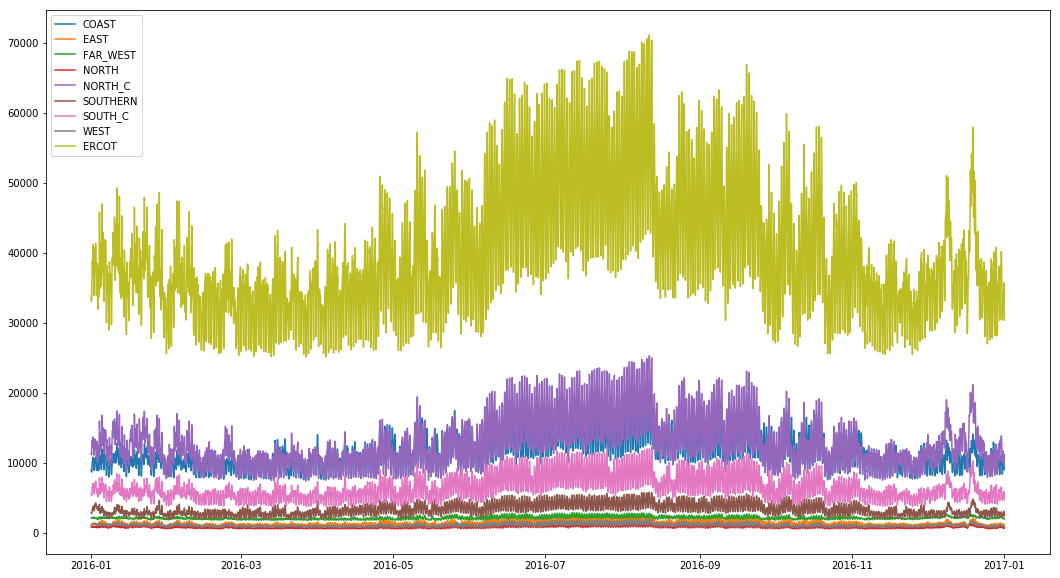

In [17]:
for i in cons_2016.columns.tolist():
    plt.plot(cons_2016[i])
plt.legend()

Note that the line labeled ERCOT is the sum of consumption from all of the ERCOT regions.

While pretty, this graph is really noisy. Let's compile the consumption data into daily totals and take a look at that.

In [7]:
cons_2016_m = pd.DataFrame(columns = cons_2016.columns.tolist()) #Initialize empty df with sales_amount column


for month in range(1,13):
    for day in range(1,32):
        try:
            date = dt.datetime(2016,month,day,0,0,0)
            cons_2016_m.loc[dt.datetime(2016,month,day,0,0,0)] = cons_2016[(cons_2016.index.year == 2016) & (cons_2016.index.month == month) & (cons_2016.index.day == day)].sum()
        except: 
            continue
        

In [8]:
cons_2016_m.head()

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
2016-01-01,223895.020876,29068.221175,49826.864429,19058.222164,288302.98939,75064.522190,143236.772053,27425.220025,855877.83229
2016-01-02,239250.283778,31013.815368,51464.671925,19705.212594,294503.87672,90676.569439,156878.778092,29470.221413,912963.42935
2016-01-03,226263.587010,28023.808614,48709.353021,19294.403620,277062.50956,85651.670824,140600.293554,26563.894310,852169.52051
2016-01-04,245932.577199,33146.694294,50673.305805,20711.801379,313653.62792,79684.910698,152014.787298,29294.841725,925112.54626
2016-01-05,252682.407051,37228.636055,52019.426703,22086.197221,336175.81251,77462.481752,156903.233984,29731.033343,964289.22862


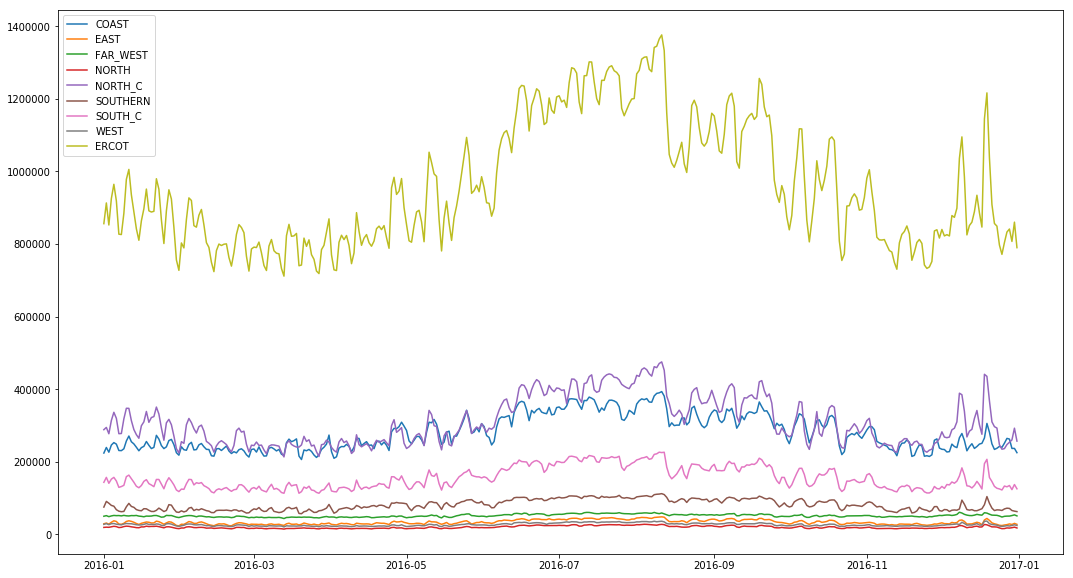

In [18]:
for i in cons_2016_m.columns.tolist():
    plt.plot(cons_2016_m[i])
plt.legend()

Let's also plot consumption without the ERCOT total to better see differences between the small regions.

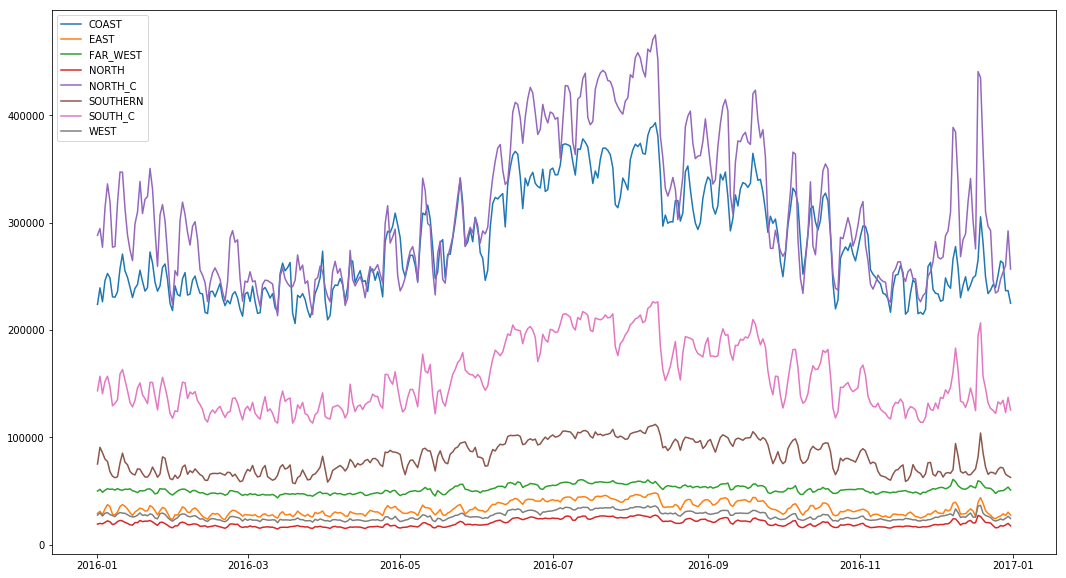

In [19]:
for i in cons_2016_m.columns.tolist():
    if i != 'ERCOT':
        plt.plot(cons_2016_m[i])
plt.legend()

These graphs are much more informative. As we can see, the coast and north central regions consistently consume the most power. Also, electricity consumption rises in the summer months and tends to fall off in the fall and winter months.

However, this consumptions still varies by quite a bit from day to day. Let's try to figure out why this is the case.

## Weather Data (for Austin)

In [11]:
austin_w = pd.read_csv('./Data/formatted/austin_w.csv')
austin_w = austin_w.drop('Unnamed: 0',axis = 1) #getting rid of unnecessary columns

In [12]:
#Converting the time column to datetimes:
austin_w['DATE'] = austin_w['DATE'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
#Setting date as the df index:
austin_w.index = austin_w['DATE']
austin_w = austin_w.drop('DATE',axis=1)

In [14]:
austin_w.head()

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,
2016-01-01,0.00,0.0,0.0,47,50,44
2016-01-02,0.22,0.0,0.0,46,48,43
2016-01-03,0.00,0.0,0.0,48,61,33
2016-01-04,0.00,0.0,0.0,44,58,32
2016-01-05,0.00,0.0,0.0,41,57,29


Text(0,0.5,'Degrees Fahrenheit')

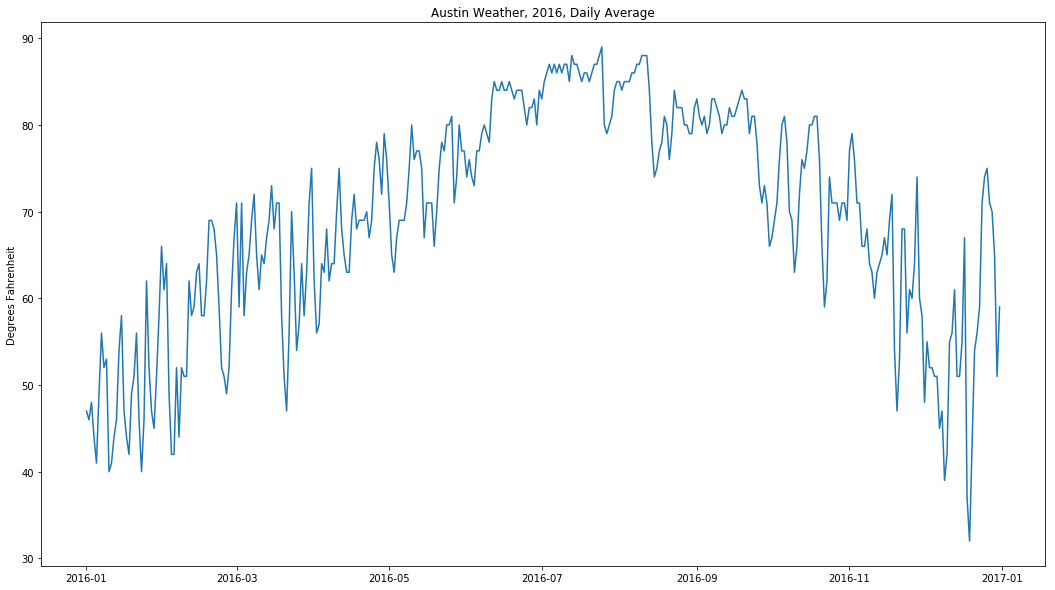

In [20]:
plt.plot(austin_w[austin_w.index.year == 2016]['TAVG'])
plt.title('Austin Weather, 2016, Daily Average')
plt.ylabel('Degrees Fahrenheit')